# Project Description

E-commerce is one of the booming industries & is a one-stop destination for various sellers to market & sell their products online to attract a larger market. Given a set of customer reviews of each category (camera, battery, display, value for money, performance) for a mobile that is live on an e-commerce platform like (Flipkart/Amazon. etc)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
tdf = pd.read_csv('/content/Flipkart_Amazon Mobile Reviews.csv')
tdf.head()

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name
0,0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


In [4]:
df= tdf
df.columns

Index(['Unnamed: 0', 'Review-Title', 'rating', 'Review-Body', 'Product Name'], dtype='object')

In [5]:
del df['Unnamed: 0']
df.head()

,Review-Title,rating,Review-Body,Product Name
0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


# Target - Rating Scale

In [6]:
df['rating'].isnull().sum()

0

In [7]:
df['rating'].value_counts()

5.0 out of 5 stars    9399
1.0 out of 5 stars    5231
4.0 out of 5 stars    4886
3.0 out of 5 stars    2703
2.0 out of 5 stars    1558
Name: rating, dtype: int64

In [8]:
# we definately do not see a balanced data set.
# the the values of 2 ratings are very low.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


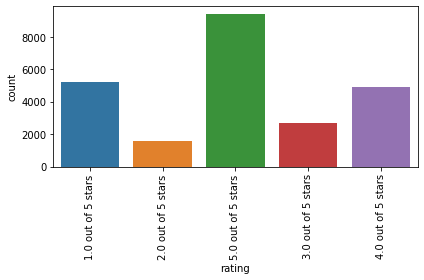

In [9]:
from matplotlib.pyplot import xticks

plt.Figure( figsize =(8,6) )
sns.countplot(df['rating'])
xticks(rotation= 90)

plt.tight_layout()
plt.show()


we clearly see an imbalanced data set.

In [10]:
df['rating'].unique()

array(['1.0 out of 5 stars', '2.0 out of 5 stars', '5.0 out of 5 stars',
       '3.0 out of 5 stars', '4.0 out of 5 stars'], dtype=object)

In [11]:
rate = {'1.0 out of 5 stars':1, '2.0 out of 5 stars':2, '5.0 out of 5 stars':5,
       '3.0 out of 5 stars':3, '4.0 out of 5 stars':4}
df['rating'].replace(rate,inplace=True)
df['rating'].head()

0    1
1    2
2    5
3    3
4    1
Name: rating, dtype: int64

# Review-Title

In [12]:
df['Review-Title'].isnull().sum()

2

In [13]:
df = df.dropna(subset=['Review-Title'])

In [14]:
df['Review-Title'].isnull().sum()

0

Lematizing the Review Title feature

In [15]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') 

lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  

    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:

            lemmatized_sentence.append(word)
        else:        

            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['review_t_processed'] = df['Review-Title'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
df.head()

,Review-Title,rating,Review-Body,Product Name,review_t_processed
0,Worst phone ever,1,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Worst phone ever
1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Ok ! ! ! Not up to the mark
2,Awesome look,5,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Awesome look
3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",One plus losing be originality ! ! !
4,Read,1,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Read


Stopwords removal

In [17]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

def remove_stopwords(rev):

    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

df['review_t_processed'] = [remove_stopwords(r) for r in df['review_t_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
df.head() 

,Review-Title,rating,Review-Body,Product Name,review_t_processed
0,Worst phone ever,1,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Worst phone ever
1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Ok ! ! ! Not mark
2,Awesome look,5,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Awesome look
3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",One plus losing originality ! ! !
4,Read,1,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",Read


In [19]:
df['review_t_processed'] = df['review_t_processed'].str.replace("[^a-zA-Z0-9]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df['review_t_processed'] = df['review_t_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df['review_t_processed'].head()

0               Worst phone ever
1                       Not mark
2                   Awesome look
3    One plus losing originality
4                           Read
Name: review_t_processed, dtype: object

In [22]:
df['review_t_processed'] = [review.lower() for review in df['review_t_processed']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df['review_t_processed'].head()

0               worst phone ever
1                       not mark
2                   awesome look
3    one plus losing originality
4                           read
Name: review_t_processed, dtype: object

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1500)

t = tfidf.fit_transform(df['review_t_processed'])

In [25]:
feature_names = tfidf.get_feature_names()
redf = pd.DataFrame(t.toarray(), columns = feature_names)
redf.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,100,1000,10000,10days,10k,10prime,10s,11000,11500,...,year,yeh,yes,yet,you,your,youth,youtube,zero,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#df = df.merge(redf,left_index=True,right_index=True)
#df.head(1)

In [27]:
#del df['review_t_processed']

In [28]:
#df.head(1)

all process for the first feature is compleate.

In [29]:
df.columns

Index(['Review-Title', 'rating', 'Review-Body', 'Product Name',
       'review_t_processed'],
      dtype='object')

# 'Review-Body'

In [30]:
df['Review-Body'].isnull().sum()

616

Imputing nan walues with title names.

In [31]:
try:
  for i in range(len(df['Review-Body'])):
    if type(df['Review-Body'][i]) == float:
      df.iloc[i,2] = df.iloc[i,0]
except:
  None

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [32]:
df['Review-Body'].isnull().sum()

391

half the value is imputed and half is not so we will drop the not imputed rows.

In [33]:
df = df.dropna(subset=['Review-Body'])

In [34]:
df['Review-Body'].isnull().sum()

0

In [35]:
# its clear now...

In [36]:
df['review_bo_processed'] = df['Review-Body'].str.replace("[^a-zA-Z0-9]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [37]:
df['review_bo_processed'] = df['review_bo_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [38]:
df['review_bo_processed'] = [review.lower() for review in df['review_bo_processed']]

In [39]:
df.head(4)

,Review-Title,rating,Review-Body,Product Name,review_t_processed,review_bo_processed
0,Worst phone ever,1,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",worst phone ever,hang problem
1,Ok !!! Not up to the mark,2,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",not mark,writing this review after using 3days honest t...
2,Awesome look,5,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",awesome look,camera good very fast phone back look awesomew...
3,One plus losing is originality!!!,3,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",one plus losing originality,the media could not loaded average product dec...


# column drop

In [40]:
# we will now drop the uncleaned columns
del df['Review-Title']
del df['Review-Body']
del df['review_t_processed']

In [41]:
df.head(3)

,rating,Product Name,review_bo_processed
0,1,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",hang problem
1,2,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",writing this review after using 3days honest t...
2,5,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",camera good very fast phone back look awesomew...


# review body cont

In [42]:
# lemmatizing

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') 

lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  

    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:

            lemmatized_sentence.append(word)
        else:        

            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['review_bo_processed'] = df['review_bo_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


stopwords

In [43]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

def remove_stopwords(rev):

    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

df['review_bo_processed'] = [remove_stopwords(r) for r in df['review_bo_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1500)

t = tfidf.fit_transform(df['review_bo_processed'])

feature_names = tfidf.get_feature_names()
rbop = pd.DataFrame(t.toarray(), columns = feature_names)
rbop.head(5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,100,1000,10000,1080p,10k,10prime,10s,10w,11k,...,wrost,xiaomi,xiomi,year,yes,yesterday,yet,youtube,zero,zoom
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.085231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.088118,0.107081,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [45]:
#both the nlp datas are ready to be merged but we will first plot the rest.
df.columns

Index(['rating', 'Product Name', 'review_bo_processed'], dtype='object')

In [46]:
del df['review_bo_processed']

# 'Product Name'

In [47]:
df['Product Name'].isnull().sum()

0

In [48]:
df['Product Name'].value_counts()

Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)           4450
OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)              4324
Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM                 3597
OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)    3570
Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)            2642
realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)      2100
vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)      1365
Samsung Galaxy M32                                            1336
Name: Product Name, dtype: int64

In [49]:
# The product name feature has no cleaning required as they sit perfect in the df.

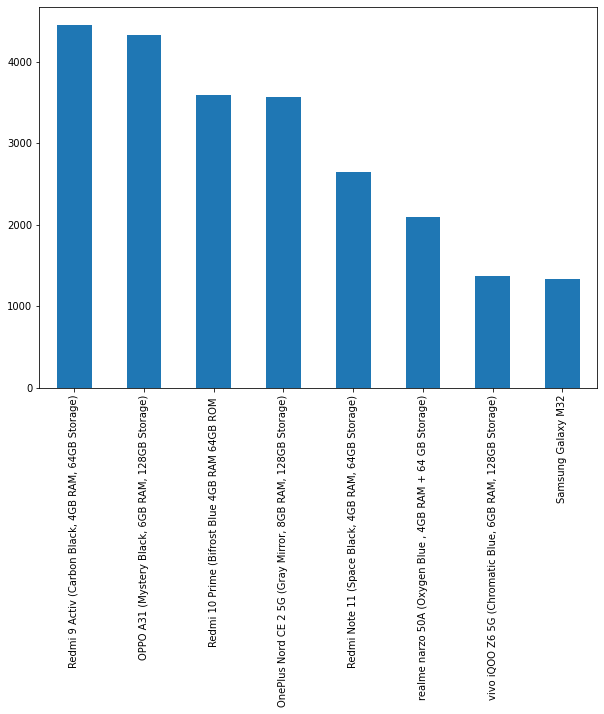

In [50]:
plt.figure(figsize=(10,7))
df['Product Name'].value_counts().plot.bar()

In [51]:
#as we see samsung has made the lowest sales as per the data.
# redmi9 stands at the peak on number of sales. 

In [52]:
df.columns

Index(['rating', 'Product Name'], dtype='object')

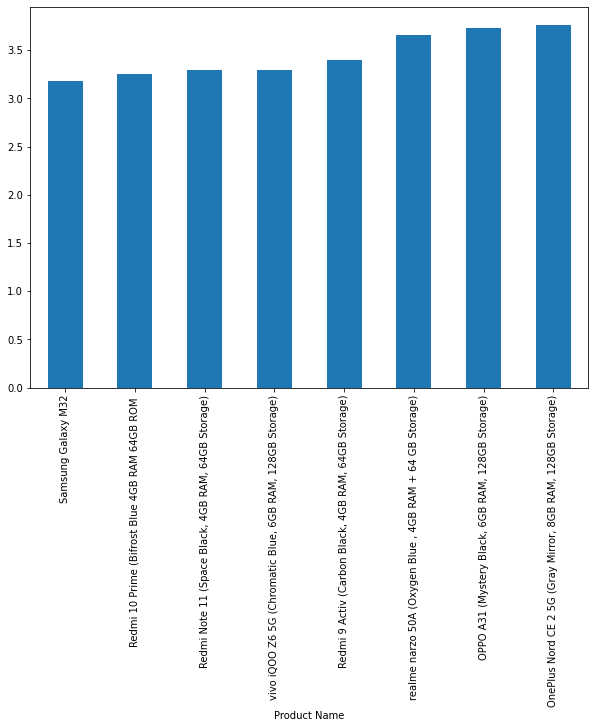

In [53]:
plt.figure(figsize=(10,7))
df.groupby(['Product Name'])['rating'].mean().sort_values().plot(kind='bar')

In [54]:
# we will do one hot encoding as this is a classification problem
# lable will set an order to the mobile phones which we dont want to do with imbalanced dataset.

In [55]:
df = pd.get_dummies(df,columns=['Product Name'])

In [56]:
df.columns

Index(['rating',
       'Product Name_OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)',
       'Product Name_OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)',
       'Product Name_Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM ',
       'Product Name_Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)',
       'Product Name_Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)',
       'Product Name_Samsung Galaxy M32',
       'Product Name_realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)',
       'Product Name_vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)'],
      dtype='object')

# merging other columns

In [57]:
df = df.merge(redf,left_index=True,right_index=True)
df.head(3)

,rating_x,"Product Name_OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)","Product Name_OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)",Product Name_Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM,"Product Name_Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)","Product Name_Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)",Product Name_Samsung Galaxy M32,"Product Name_realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)","Product Name_vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)",000,...,year,yeh,yes,yet,you,your,youth,youtube,zero,zoom
0,1,0,1,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,1,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0,1,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df = df.merge(rbop.add_suffix('1'),left_index=True,right_index=True)
df.head(3)

,rating_x,"Product Name_OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)","Product Name_OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)",Product Name_Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM,"Product Name_Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)","Product Name_Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)",Product Name_Samsung Galaxy M32,"Product Name_realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)","Product Name_vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)",000,...,wrost1,xiaomi1,xiomi1,year1,yes1,yesterday1,yet1,youtube1,zero1,zoom1
0,1,0,1,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,1,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0,1,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
df.columns

Index(['rating_x',
       'Product Name_OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)',
       'Product Name_OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)',
       'Product Name_Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM ',
       'Product Name_Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)',
       'Product Name_Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)',
       'Product Name_Samsung Galaxy M32',
       'Product Name_realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)',
       'Product Name_vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)',
       '000',
       ...
       'wrost1', 'xiaomi1', 'xiomi1', 'year1', 'yes1', 'yesterday1', 'yet1',
       'youtube1', 'zero1', 'zoom1'],
      dtype='object', length=3009)

# spliting and scaling the data.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [61]:
x = df.drop(columns=['rating_x'])
y = df['rating_x']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
x_train.head()

,"Product Name_OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)","Product Name_OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)",Product Name_Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM,"Product Name_Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)","Product Name_Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)",Product Name_Samsung Galaxy M32,"Product Name_realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)","Product Name_vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)",000,100,...,wrost1,xiaomi1,xiomi1,year1,yes1,yesterday1,yet1,youtube1,zero1,zoom1
6103,1,0,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389,0,1,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12045,0,0,1,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22019,0,0,0,0,0,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21629,0,0,0,0,0,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Balanced learning.

In [63]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
x_smt, y_smt = smt.fit_resample(x_train, y_train)
x_dsmt, y_dsmt = x_smt, y_smt # for decition tree
x_rsmt, y_rsmt = x_smt, y_smt # for randomforest
x_xsmt, y_xsmt = x_smt, y_smt # for Xgboost

# Knn model

In [63]:
# p = []
# for i in range(1,20): 
#   for j in range(4,10): 
#     p.append((str(i)+str(j)))

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

score = -70
l = 0
for i in range(3,30): # best K_value
    # print(round(((p.index(str(i)+str(j)))/114)*100))
    knn = KNeighborsClassifier(i)
    knn.fit(x_smt,y_smt)
    s = np.mean(cross_val_score(knn, x_smt, y_smt, cv=9)) # mean cv_score
    t = knn.score(x_smt,y_smt)
    if s > score and t > s: # condition to block overfit.
      score = s
      l = i

In [65]:
print('The best score obtained = ',score.round(2))
print('The best Nearest Neighbors =',l)#,'\nThe best cross validation fold =',c)

The best score obtained =  0.91
The best Nearest Neighbors = 3


In [66]:
knn = KNeighborsClassifier(l)
knn.fit(x_smt,y_smt)

KNeighborsClassifier(n_neighbors=3)

In [67]:
y_pred = knn.predict(x_test)

Confusion matrix:
 [[200 535 323 195  30]
 [ 56 127 115  53   9]
 [102 251 203 103  20]
 [150 448 331 189  61]
 [301 832 575 373 177]]


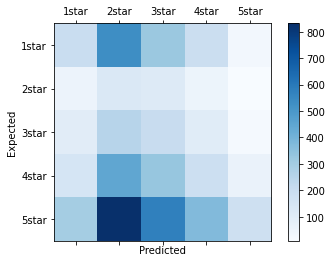

In [68]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['1star','2star','3star','4star','5star']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Decision Tree Model

In [69]:
from sklearn.tree import DecisionTreeClassifier
score = -80
l = 0
for i in range(1,30):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(x_dsmt, y_dsmt)
    s = np.mean(cross_val_score(dt, x_dsmt, y_dsmt, cv=9)) # mean cv_score
    t = dt.score(x_dsmt, y_dsmt)
    if s > score and t > s:# condition to block overfit.
      score = s
      l = i

In [70]:
print('The best score obtained = ',score.round(2))
print('The best depth =',l)

The best score obtained =  0.57
The best depth = 29


In [71]:
dt = DecisionTreeClassifier(max_depth=l)
dt.fit(x_dsmt, y_dsmt)

DecisionTreeClassifier(max_depth=29)

In [72]:
y_pred = dt.predict(x_test)

Confusion matrix:
 [[ 202  229  759   76   17]
 [  47   75  214   18    6]
 [  56  111  429   69   14]
 [ 104  213  620  133  109]
 [ 196  397 1124  246  295]]


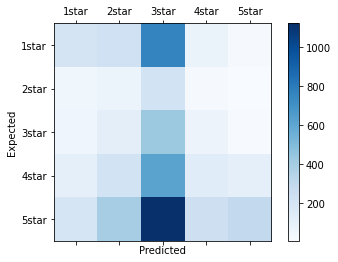

In [73]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['1star','2star','3star','4star','5star']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Random forest model

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
score=-80
for i in range(1,20):
  rf = RandomForestClassifier(n_estimators= 100, max_depth = i, max_features='sqrt')
  rf.fit(x_rsmt, y_rsmt)
  s = np.mean(cross_val_score(rf, x_rsmt, y_rsmt, cv=9)) # mean cv_score
  t = rf.score(x_rsmt, y_rsmt)
  if s > score and t > s:# condition to block overfit.
    score = s
    l = i

In [75]:
print('The best score obtained = ',score.round(2))
print('The best depth =',l)

The best score obtained =  0.52
The best depth = 19


In [76]:
rf = RandomForestClassifier(n_estimators= 100, max_depth = l, max_features='sqrt')
rf.fit(x_rsmt, y_rsmt)

RandomForestClassifier(max_depth=19, max_features='sqrt')

In [77]:
y_pred = rf.predict(x_test)

Confusion matrix:
 [[   6 1159  113    4    1]
 [   0  316   43    0    1]
 [   0  579   95    4    1]
 [   0  999  166   11    3]
 [   1 1926  278   20   33]]


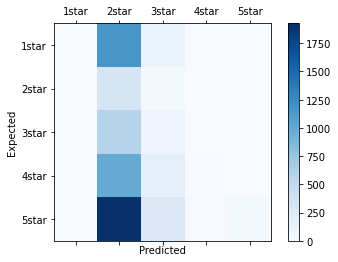

In [78]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['1star','2star','3star','4star','5star']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# XGBoost model

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
score = -70
l = 0
for lr in np.arange(0.01, 0.35, 0.01):
  lr = round(lr,2)
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(x_xsmt, y_xsmt) 
  s = np.mean(cross_val_score(model, x_xsmt, y_xsmt, cv=10))
  t = model.score(x_xsmt, y_xsmt)
  if s > score and t > s:
    score = s
    l = lr
print('The best score obtained = ',score)
print('The learning rate =',l)

In [ ]:
model = xgb.XGBClassifier(learning_rate = l, n_estimators=100, verbosity = 0)
model.fit(x_xsmt, y_xsmt)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['1star','2star','3star','4star','5star']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()